In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
import tensorflow.keras.models as models
import numpy as np
import random

2025-06-17 13:35:23.281864: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-17 13:35:23.372059: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-06-17 13:35:23.372087: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-06-17 13:35:23.372094: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-17 13:35:23.418503: I tensorflow/core/platform/cpu_feature_g

In [2]:
samples = 200000

In [3]:
# Génération des données
x_data = np.arange(0, samples).astype(np.float32).reshape(-1, 1)
y_data = (x_data % 3 == 0).astype(np.float32)

# Séparation en jeu d'entraînement et de test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

In [4]:
x_train

array([[153248.],
       [ 67802.],
       [148889.],
       ...,
       [131932.],
       [146867.],
       [121958.]], dtype=float32)

In [5]:
y_train

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [6]:
def my_model():
    return tf.keras.Sequential([
        tf.keras.layers.Dense(32, activation='relu', input_shape=(1,)),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

In [7]:
model = my_model()

model.compile(
    optimizer=keras.optimizers.Adam(3e-4),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                64        
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 609 (2.38 KB)
Trainable params: 609 (2.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2025-06-16 13:47:18.124116: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-06-16 13:47:18.143287: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-06-16 13:47:18.143402: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [3]:
from IPython.display import clear_output
from matplotlib import pyplot as plt

class LivePlotCallback(tf.keras.callbacks.Callback):
    def __init__(self, X_val, Y_val):
        super().__init__()
        self.X_val = X_val
        self.Y_val = Y_val
        self.train_losses = []
        self.train_accuracies = []
        self.val_losses = []
        self.val_accuracies = []

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        self.train_losses.append(logs.get('loss'))
        self.train_accuracies.append(logs.get('accuracy'))

        val_loss, val_acc = self.model.evaluate(self.X_val, self.Y_val, verbose=0)
        self.val_losses.append(val_loss)
        self.val_accuracies.append(val_acc)

        # Clear and redraw plot
        clear_output(wait=True)
        epochs = range(1, len(self.train_losses) + 1)

        plt.figure(figsize=(14, 5))

        # Loss plot
        plt.subplot(1, 2, 1)
        plt.plot(epochs, self.train_losses, label='Training Loss')
        plt.plot(epochs, self.val_losses, label='Evaluation Loss')
        plt.title('Loss over Epochs')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True)

        # Accuracy plot
        plt.subplot(1, 2, 2)
        plt.plot(epochs, self.train_accuracies, label='Training Accuracy')
        plt.plot(epochs, self.val_accuracies, label='Evaluation Accuracy')
        plt.title('Accuracy over Epochs')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.grid(True)

        plt.tight_layout()
        plt.show()

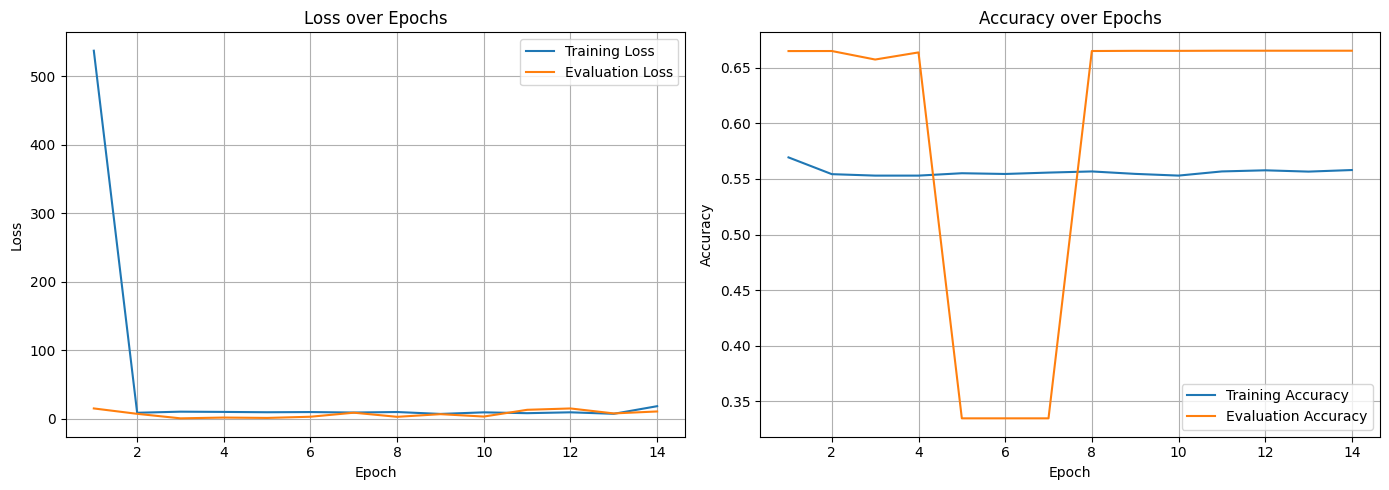

625/625 [==============================] - 2s 2ms/step - loss: 18.4412 - accuracy: 0.5580
Epoch 15/300
509/625 [=======================>......] - ETA: 0s - loss: 13.4770 - accuracy: 0.5545

KeyboardInterrupt: 

In [9]:
live_plot_cb = LivePlotCallback(x_test, y_test)

history = model.fit(
    x_train, y_train,
    epochs=300,
    batch_size=256,
    callbacks=[
        tf.keras.callbacks.ModelCheckpoint("divide2.keras"),
        live_plot_cb
    ]
)

In [10]:
model.predict(np.array([3]))

1/1 [==============================] - 0s 45ms/step


array([[0.49813065]], dtype=float32)

In [4]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Epoch 1/30
23/23 [==============================] - 1s 5ms/step - loss: 11.0545 - accuracy: 0.4944 - val_loss: 3.1885 - val_accuracy: 0.6125
Epoch 2/30
23/23 [==============================] - 0s 2ms/step - loss: 1.6929 - accuracy: 0.5278 - val_loss: 0.7204 - val_accuracy: 0.4250
Epoch 3/30
23/23 [==============================] - 0s 2ms/step - loss: 0.7003 - accuracy: 0.5833 - val_loss: 0.6721 - val_accuracy: 0.6125
Epoch 4/30
23/23 [==============================] - 0s 3ms/step - loss: 0.6833 - accuracy: 0.6278 - val_loss: 0.7210 - val_accuracy: 0.4500
Epoch 5/30
23/23 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5778 - val_loss: 0.6638 - val_accuracy: 0.6125
Epoch 6/30
23/23 [==============================] - 0s 3ms/step - loss: 0.6845 - accuracy: 0.6208 - val_loss: 0.6629 - val_accuracy: 0.6125
Epoch 7/30
23/23 [==============================] - 0s 3ms/step - loss: 0.6742 - accuracy: 0.6583 - val_loss: 0.7672 - val_accuracy: 0.4250
Epoch 8/30
23/23 [=

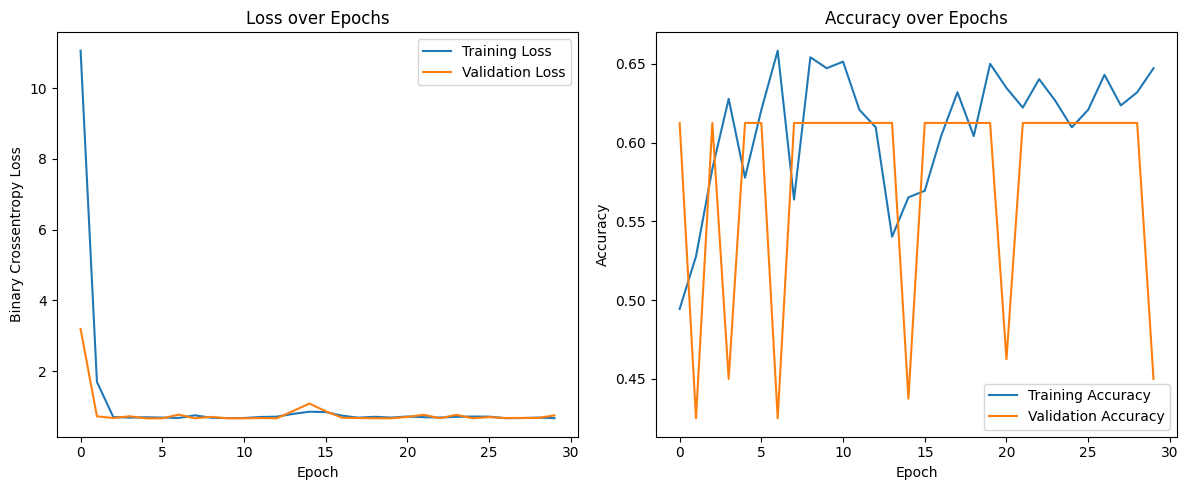

9: Not divisible by 3
10: Not divisible by 3
15: Not divisible by 3
100: Not divisible by 3
999: Divisible by 3


In [14]:
x_data = np.arange(0, 1000, dtype=np.float32).reshape(-1, 1)
y_data = (x_data % 3 == 0).astype(np.float32)

#x_data = x_data / 1000.0
x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data, test_size=0.2, random_state=42
)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


history = model.fit(
    x_train, y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {accuracy * 100:.2f}%")


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Binary Crossentropy Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

def is_divisible_by_3(x: int) -> int:
    x_scaled = np.array([[x]], dtype=np.float32)
    pred_prob = model.predict(x_scaled, verbose=0)[0][0]
    return int(pred_prob > 0.5)

for number in [9, 10, 15, 100, 999]:
    print(f"{number}: {'Divisible by 3' if is_divisible_by_3(number) else 'Not divisible by 3'}")


In [ ]:
def sum_num(x):
    return sum([int(d) for d in str(x)])

In [172]:
from tensorflow.keras.regularizers import l1

samples = 10000
X_train_val = np.random.uniform(-10, 10, size=(samples, 1)).astype("float64")   # shape (N,1)
X_test = np.random.uniform(-10, 10, size=(samples, 1)).astype("float64")   # shape (N,1)
y_train_val = (np.floor(X_train_val) % 3 == 0).astype("float32") 
y_test = (np.floor(X_test) % 3 == 0).astype("float32") 

print(X_train_val.shape, y_train_val.shape)
print(X_train_val.dtype, y_train_val.dtype)
print(X_train_val[0:5])
print(y_train_val[0:5])

model = Sequential()
model.add(keras.layers.Dense(32, input_shape=(1,), name='fc1', kernel_initializer='lecun_uniform', kernel_regularizer=l1(0.0001)))
model.add(keras.layers.Activation(activation='relu', name='relu1'))
model.add(keras.layers.Dense(32, name='fc2', kernel_initializer='lecun_uniform', kernel_regularizer=l1(0.0001)))
model.add(keras.layers.Activation(activation='relu', name='relu2'))
model.add(keras.layers.Dense(32, name='fc3', kernel_initializer='lecun_uniform', kernel_regularizer=l1(0.0001)))
model.add(keras.layers.Activation(activation='relu', name='relu3'))
model.add(keras.layers.Dense(1, name='output', kernel_initializer='lecun_uniform', kernel_regularizer=l1(0.0001)))

model.compile(
    optimizer=keras.optimizers.Adam(3e-4),
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

model.summary()

history = model.fit(
    X_train_val,
    y_train_val,
    batch_size=1024*2,
    epochs=6000,
    validation_split=0.25,
)

(10000, 1) (10000, 1)
float64 float32
[[-1.05834125]
 [ 2.56738626]
 [ 1.33864103]
 [ 8.33506391]
 [ 2.61901032]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]
Model: "sequential_69"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 fc1 (Dense)                 (None, 32)                64        
                                                                 
 relu1 (Activation)          (None, 32)                0         
                                                                 
 fc2 (Dense)                 (None, 32)                1056      
                                                                 
 relu2 (Activation)          (None, 32)                0         
                                                                 
 fc3 (Dense)                 (None, 32)                1056      
                                                                 
 relu3 (Activation)          (None, 32) 

4/4 [==============================] - 0s 8ms/step - loss: 0.6528 - accuracy: 0.6599 - val_loss: 0.6501 - val_accuracy: 0.6636
Epoch 107/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.6524 - accuracy: 0.6599 - val_loss: 0.6496 - val_accuracy: 0.6636
Epoch 108/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.6522 - accuracy: 0.6599 - val_loss: 0.6493 - val_accuracy: 0.6636
Epoch 109/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.6518 - accuracy: 0.6599 - val_loss: 0.6491 - val_accuracy: 0.6636
Epoch 110/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.6515 - accuracy: 0.6599 - val_loss: 0.6488 - val_accuracy: 0.6636
Epoch 111/6000
4/4 [==============================] - 0s 7ms/step - loss: 0.6511 - accuracy: 0.6599 - val_loss: 0.6485 - val_accuracy: 0.6636
Epoch 112/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.6509 - accuracy: 0.6599 - val_loss: 0.6482 - val_accuracy: 0.6636
Epoch 113/6000
4/4 [=

Epoch 164/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.6382 - accuracy: 0.6599 - val_loss: 0.6355 - val_accuracy: 0.6636
Epoch 165/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.6380 - accuracy: 0.6599 - val_loss: 0.6357 - val_accuracy: 0.6636
Epoch 166/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.6380 - accuracy: 0.6599 - val_loss: 0.6351 - val_accuracy: 0.6636
Epoch 167/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.6376 - accuracy: 0.6599 - val_loss: 0.6352 - val_accuracy: 0.6636
Epoch 168/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.6372 - accuracy: 0.6599 - val_loss: 0.6350 - val_accuracy: 0.6636
Epoch 169/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.6371 - accuracy: 0.6599 - val_loss: 0.6348 - val_accuracy: 0.6636
Epoch 170/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.6371 - accuracy: 0.6599 - val_loss: 0.6345 - val_accuracy: 0.6636
Epoch 

Epoch 222/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.6247 - accuracy: 0.6599 - val_loss: 0.6223 - val_accuracy: 0.6636
Epoch 223/6000
4/4 [==============================] - 0s 8ms/step - loss: 0.6245 - accuracy: 0.6599 - val_loss: 0.6206 - val_accuracy: 0.6636
Epoch 224/6000
4/4 [==============================] - 0s 7ms/step - loss: 0.6242 - accuracy: 0.6599 - val_loss: 0.6205 - val_accuracy: 0.6636
Epoch 225/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.6235 - accuracy: 0.6599 - val_loss: 0.6210 - val_accuracy: 0.6636
Epoch 226/6000
4/4 [==============================] - 0s 7ms/step - loss: 0.6236 - accuracy: 0.6599 - val_loss: 0.6198 - val_accuracy: 0.6636
Epoch 227/6000
4/4 [==============================] - 0s 7ms/step - loss: 0.6230 - accuracy: 0.6599 - val_loss: 0.6194 - val_accuracy: 0.6636
Epoch 228/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.6228 - accuracy: 0.6599 - val_loss: 0.6194 - val_accuracy: 0.6636
Epoch 

Epoch 280/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.6051 - accuracy: 0.6827 - val_loss: 0.6003 - val_accuracy: 0.6936
Epoch 281/6000
4/4 [==============================] - 0s 7ms/step - loss: 0.6047 - accuracy: 0.6833 - val_loss: 0.6001 - val_accuracy: 0.6936
Epoch 282/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.6043 - accuracy: 0.6836 - val_loss: 0.5994 - val_accuracy: 0.6948
Epoch 283/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.6037 - accuracy: 0.6841 - val_loss: 0.5991 - val_accuracy: 0.6952
Epoch 284/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.6035 - accuracy: 0.6843 - val_loss: 0.5987 - val_accuracy: 0.6952
Epoch 285/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.6032 - accuracy: 0.6845 - val_loss: 0.5986 - val_accuracy: 0.6952
Epoch 286/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.6029 - accuracy: 0.6849 - val_loss: 0.5978 - val_accuracy: 0.6952
Epoch 

Epoch 338/6000
4/4 [==============================] - 0s 7ms/step - loss: 0.5870 - accuracy: 0.6957 - val_loss: 0.5811 - val_accuracy: 0.7088
Epoch 339/6000
4/4 [==============================] - 0s 7ms/step - loss: 0.5865 - accuracy: 0.6961 - val_loss: 0.5812 - val_accuracy: 0.7088
Epoch 340/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.5864 - accuracy: 0.6967 - val_loss: 0.5806 - val_accuracy: 0.7088
Epoch 341/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.5860 - accuracy: 0.6967 - val_loss: 0.5802 - val_accuracy: 0.7092
Epoch 342/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.5861 - accuracy: 0.6968 - val_loss: 0.5804 - val_accuracy: 0.7092
Epoch 343/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.5857 - accuracy: 0.6968 - val_loss: 0.5798 - val_accuracy: 0.7092
Epoch 344/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.5855 - accuracy: 0.6968 - val_loss: 0.5799 - val_accuracy: 0.7092
Epoch 

Epoch 396/6000
4/4 [==============================] - 0s 7ms/step - loss: 0.5748 - accuracy: 0.7007 - val_loss: 0.5687 - val_accuracy: 0.7148
Epoch 397/6000
4/4 [==============================] - 0s 8ms/step - loss: 0.5748 - accuracy: 0.7009 - val_loss: 0.5684 - val_accuracy: 0.7148
Epoch 398/6000
4/4 [==============================] - 0s 9ms/step - loss: 0.5748 - accuracy: 0.7008 - val_loss: 0.5684 - val_accuracy: 0.7148
Epoch 399/6000
4/4 [==============================] - 0s 7ms/step - loss: 0.5744 - accuracy: 0.7008 - val_loss: 0.5684 - val_accuracy: 0.7148
Epoch 400/6000
4/4 [==============================] - 0s 8ms/step - loss: 0.5743 - accuracy: 0.7008 - val_loss: 0.5681 - val_accuracy: 0.7148
Epoch 401/6000
4/4 [==============================] - 0s 10ms/step - loss: 0.5741 - accuracy: 0.7009 - val_loss: 0.5679 - val_accuracy: 0.7148
Epoch 402/6000
4/4 [==============================] - 0s 7ms/step - loss: 0.5743 - accuracy: 0.7009 - val_loss: 0.5681 - val_accuracy: 0.7148
Epoch

Epoch 511/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.5644 - accuracy: 0.7039 - val_loss: 0.5572 - val_accuracy: 0.7296
Epoch 512/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.5637 - accuracy: 0.7161 - val_loss: 0.5564 - val_accuracy: 0.7172
Epoch 513/6000
4/4 [==============================] - 0s 7ms/step - loss: 0.5634 - accuracy: 0.7039 - val_loss: 0.5563 - val_accuracy: 0.7172
Epoch 514/6000
4/4 [==============================] - 0s 7ms/step - loss: 0.5635 - accuracy: 0.7105 - val_loss: 0.5568 - val_accuracy: 0.7244
Epoch 515/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.5629 - accuracy: 0.7060 - val_loss: 0.5560 - val_accuracy: 0.7172
Epoch 516/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.5637 - accuracy: 0.7037 - val_loss: 0.5563 - val_accuracy: 0.7172
Epoch 517/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.5637 - accuracy: 0.7164 - val_loss: 0.5569 - val_accuracy: 0.7272
Epoch 

Epoch 569/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.5603 - accuracy: 0.7121 - val_loss: 0.5529 - val_accuracy: 0.7172
Epoch 570/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.5602 - accuracy: 0.7047 - val_loss: 0.5532 - val_accuracy: 0.7244
Epoch 571/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.5603 - accuracy: 0.7133 - val_loss: 0.5532 - val_accuracy: 0.7248
Epoch 572/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.5605 - accuracy: 0.7128 - val_loss: 0.5528 - val_accuracy: 0.7172
Epoch 573/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.5603 - accuracy: 0.7047 - val_loss: 0.5535 - val_accuracy: 0.7192
Epoch 574/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.5603 - accuracy: 0.7139 - val_loss: 0.5533 - val_accuracy: 0.7336
Epoch 575/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.5602 - accuracy: 0.7105 - val_loss: 0.5526 - val_accuracy: 0.7172
Epoch 

Epoch 627/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.5579 - accuracy: 0.7096 - val_loss: 0.5507 - val_accuracy: 0.7340
Epoch 628/6000
4/4 [==============================] - 0s 7ms/step - loss: 0.5578 - accuracy: 0.7160 - val_loss: 0.5502 - val_accuracy: 0.7172
Epoch 629/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.5576 - accuracy: 0.7080 - val_loss: 0.5505 - val_accuracy: 0.7272
Epoch 630/6000
4/4 [==============================] - 0s 7ms/step - loss: 0.5577 - accuracy: 0.7133 - val_loss: 0.5503 - val_accuracy: 0.7252
Epoch 631/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.5575 - accuracy: 0.7133 - val_loss: 0.5502 - val_accuracy: 0.7236
Epoch 632/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.5577 - accuracy: 0.7097 - val_loss: 0.5503 - val_accuracy: 0.7284
Epoch 633/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.5583 - accuracy: 0.7105 - val_loss: 0.5504 - val_accuracy: 0.7236
Epoch 

Epoch 685/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.5560 - accuracy: 0.7195 - val_loss: 0.5481 - val_accuracy: 0.7320
Epoch 686/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.5558 - accuracy: 0.7109 - val_loss: 0.5477 - val_accuracy: 0.7196
Epoch 687/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.5559 - accuracy: 0.7151 - val_loss: 0.5488 - val_accuracy: 0.7392
Epoch 688/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.5557 - accuracy: 0.7125 - val_loss: 0.5477 - val_accuracy: 0.7176
Epoch 689/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.5558 - accuracy: 0.7137 - val_loss: 0.5487 - val_accuracy: 0.7448
Epoch 690/6000
4/4 [==============================] - 0s 7ms/step - loss: 0.5555 - accuracy: 0.7240 - val_loss: 0.5478 - val_accuracy: 0.7216
Epoch 691/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.5556 - accuracy: 0.7100 - val_loss: 0.5479 - val_accuracy: 0.7264
Epoch 

Epoch 743/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.5540 - accuracy: 0.7256 - val_loss: 0.5458 - val_accuracy: 0.7244
Epoch 744/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.5539 - accuracy: 0.7151 - val_loss: 0.5462 - val_accuracy: 0.7372
Epoch 745/6000
4/4 [==============================] - 0s 7ms/step - loss: 0.5542 - accuracy: 0.7232 - val_loss: 0.5461 - val_accuracy: 0.7284
Epoch 746/6000
4/4 [==============================] - 0s 7ms/step - loss: 0.5537 - accuracy: 0.7112 - val_loss: 0.5459 - val_accuracy: 0.7348
Epoch 747/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.5542 - accuracy: 0.7253 - val_loss: 0.5462 - val_accuracy: 0.7416
Epoch 748/6000
4/4 [==============================] - 0s 7ms/step - loss: 0.5535 - accuracy: 0.7208 - val_loss: 0.5460 - val_accuracy: 0.7284
Epoch 749/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.5537 - accuracy: 0.7200 - val_loss: 0.5460 - val_accuracy: 0.7360
Epoch 

Epoch 858/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.5509 - accuracy: 0.7261 - val_loss: 0.5426 - val_accuracy: 0.7280
Epoch 859/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.5507 - accuracy: 0.7199 - val_loss: 0.5428 - val_accuracy: 0.7496
Epoch 860/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.5509 - accuracy: 0.7321 - val_loss: 0.5422 - val_accuracy: 0.7304
Epoch 861/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.5504 - accuracy: 0.7185 - val_loss: 0.5431 - val_accuracy: 0.7416
Epoch 862/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.5508 - accuracy: 0.7279 - val_loss: 0.5424 - val_accuracy: 0.7436
Epoch 863/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.5505 - accuracy: 0.7281 - val_loss: 0.5421 - val_accuracy: 0.7324
Epoch 864/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.5503 - accuracy: 0.7236 - val_loss: 0.5425 - val_accuracy: 0.7468
Epoch 

Epoch 916/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.5493 - accuracy: 0.7396 - val_loss: 0.5404 - val_accuracy: 0.7356
Epoch 917/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.5491 - accuracy: 0.7189 - val_loss: 0.5405 - val_accuracy: 0.7424
Epoch 918/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.5489 - accuracy: 0.7340 - val_loss: 0.5406 - val_accuracy: 0.7456
Epoch 919/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.5495 - accuracy: 0.7160 - val_loss: 0.5405 - val_accuracy: 0.7432
Epoch 920/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.5500 - accuracy: 0.7429 - val_loss: 0.5408 - val_accuracy: 0.7472
Epoch 921/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.5496 - accuracy: 0.7161 - val_loss: 0.5405 - val_accuracy: 0.7260
Epoch 922/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.5491 - accuracy: 0.7316 - val_loss: 0.5424 - val_accuracy: 0.7560
Epoch 

Epoch 974/6000
4/4 [==============================] - 0s 7ms/step - loss: 0.5484 - accuracy: 0.7139 - val_loss: 0.5400 - val_accuracy: 0.7544
Epoch 975/6000
4/4 [==============================] - 0s 11ms/step - loss: 0.5478 - accuracy: 0.7457 - val_loss: 0.5391 - val_accuracy: 0.7488
Epoch 976/6000
4/4 [==============================] - 0s 9ms/step - loss: 0.5475 - accuracy: 0.7208 - val_loss: 0.5387 - val_accuracy: 0.7396
Epoch 977/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.5471 - accuracy: 0.7329 - val_loss: 0.5396 - val_accuracy: 0.7540
Epoch 978/6000
4/4 [==============================] - 0s 7ms/step - loss: 0.5471 - accuracy: 0.7337 - val_loss: 0.5386 - val_accuracy: 0.7400
Epoch 979/6000
4/4 [==============================] - 0s 10ms/step - loss: 0.5470 - accuracy: 0.7263 - val_loss: 0.5388 - val_accuracy: 0.7484
Epoch 980/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.5470 - accuracy: 0.7344 - val_loss: 0.5388 - val_accuracy: 0.7472
Epoc

4/4 [==============================] - 0s 6ms/step - loss: 0.5346 - accuracy: 0.7323 - val_loss: 0.5249 - val_accuracy: 0.7432
Epoch 1089/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.5344 - accuracy: 0.7305 - val_loss: 0.5256 - val_accuracy: 0.7536
Epoch 1090/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.5345 - accuracy: 0.7353 - val_loss: 0.5246 - val_accuracy: 0.7424
Epoch 1091/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.5342 - accuracy: 0.7276 - val_loss: 0.5247 - val_accuracy: 0.7496
Epoch 1092/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.5343 - accuracy: 0.7369 - val_loss: 0.5243 - val_accuracy: 0.7464
Epoch 1093/6000
4/4 [==============================] - 0s 7ms/step - loss: 0.5345 - accuracy: 0.7253 - val_loss: 0.5241 - val_accuracy: 0.7464
Epoch 1094/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.5337 - accuracy: 0.7317 - val_loss: 0.5244 - val_accuracy: 0.7492
Epoch 1095/6000

4/4 [==============================] - 0s 6ms/step - loss: 0.5181 - accuracy: 0.7308 - val_loss: 0.5069 - val_accuracy: 0.7496
Epoch 1203/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.5179 - accuracy: 0.7315 - val_loss: 0.5067 - val_accuracy: 0.7504
Epoch 1204/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.5179 - accuracy: 0.7361 - val_loss: 0.5064 - val_accuracy: 0.7492
Epoch 1205/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.5176 - accuracy: 0.7308 - val_loss: 0.5066 - val_accuracy: 0.7476
Epoch 1206/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.5175 - accuracy: 0.7347 - val_loss: 0.5063 - val_accuracy: 0.7492
Epoch 1207/6000
4/4 [==============================] - 0s 7ms/step - loss: 0.5173 - accuracy: 0.7325 - val_loss: 0.5061 - val_accuracy: 0.7496
Epoch 1208/6000
4/4 [==============================] - 0s 12ms/step - loss: 0.5173 - accuracy: 0.7340 - val_loss: 0.5058 - val_accuracy: 0.7444
Epoch 1209/600

4/4 [==============================] - 0s 6ms/step - loss: 0.5053 - accuracy: 0.7444 - val_loss: 0.4930 - val_accuracy: 0.7508
Epoch 1317/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.5061 - accuracy: 0.7316 - val_loss: 0.4931 - val_accuracy: 0.7536
Epoch 1318/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.5051 - accuracy: 0.7417 - val_loss: 0.4925 - val_accuracy: 0.7508
Epoch 1319/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.5054 - accuracy: 0.7301 - val_loss: 0.4930 - val_accuracy: 0.7556
Epoch 1320/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.5054 - accuracy: 0.7452 - val_loss: 0.4926 - val_accuracy: 0.7496
Epoch 1321/6000
4/4 [==============================] - 0s 7ms/step - loss: 0.5052 - accuracy: 0.7309 - val_loss: 0.4925 - val_accuracy: 0.7528
Epoch 1322/6000
4/4 [==============================] - 0s 7ms/step - loss: 0.5042 - accuracy: 0.7407 - val_loss: 0.4925 - val_accuracy: 0.7528
Epoch 1323/6000

4/4 [==============================] - 0s 6ms/step - loss: 0.4909 - accuracy: 0.7372 - val_loss: 0.4784 - val_accuracy: 0.7564
Epoch 1431/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.4908 - accuracy: 0.7443 - val_loss: 0.4783 - val_accuracy: 0.7556
Epoch 1432/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.4902 - accuracy: 0.7387 - val_loss: 0.4780 - val_accuracy: 0.7556
Epoch 1433/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.4903 - accuracy: 0.7427 - val_loss: 0.4778 - val_accuracy: 0.7552
Epoch 1434/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.4905 - accuracy: 0.7389 - val_loss: 0.4783 - val_accuracy: 0.7572
Epoch 1435/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.4900 - accuracy: 0.7452 - val_loss: 0.4775 - val_accuracy: 0.7508
Epoch 1436/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.4904 - accuracy: 0.7348 - val_loss: 0.4785 - val_accuracy: 0.7572
Epoch 1437/6000

4/4 [==============================] - 0s 7ms/step - loss: 0.4742 - accuracy: 0.7681 - val_loss: 0.4618 - val_accuracy: 0.7868
Epoch 1545/6000
4/4 [==============================] - 0s 7ms/step - loss: 0.4737 - accuracy: 0.7684 - val_loss: 0.4618 - val_accuracy: 0.7848
Epoch 1546/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.4734 - accuracy: 0.7712 - val_loss: 0.4613 - val_accuracy: 0.7852
Epoch 1547/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.4734 - accuracy: 0.7692 - val_loss: 0.4611 - val_accuracy: 0.7872
Epoch 1548/6000
4/4 [==============================] - 0s 7ms/step - loss: 0.4732 - accuracy: 0.7731 - val_loss: 0.4607 - val_accuracy: 0.7852
Epoch 1549/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.4732 - accuracy: 0.7669 - val_loss: 0.4618 - val_accuracy: 0.7884
Epoch 1550/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.4732 - accuracy: 0.7749 - val_loss: 0.4609 - val_accuracy: 0.7848
Epoch 1551/6000

4/4 [==============================] - 0s 6ms/step - loss: 0.4592 - accuracy: 0.7803 - val_loss: 0.4473 - val_accuracy: 0.7944
Epoch 1659/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.4591 - accuracy: 0.7845 - val_loss: 0.4468 - val_accuracy: 0.7940
Epoch 1660/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.4587 - accuracy: 0.7781 - val_loss: 0.4478 - val_accuracy: 0.7968
Epoch 1661/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.4597 - accuracy: 0.7889 - val_loss: 0.4473 - val_accuracy: 0.7912
Epoch 1662/6000
4/4 [==============================] - 0s 8ms/step - loss: 0.4608 - accuracy: 0.7759 - val_loss: 0.4496 - val_accuracy: 0.8036
Epoch 1663/6000
4/4 [==============================] - 0s 8ms/step - loss: 0.4595 - accuracy: 0.7907 - val_loss: 0.4470 - val_accuracy: 0.7920
Epoch 1664/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.4590 - accuracy: 0.7789 - val_loss: 0.4478 - val_accuracy: 0.7980
Epoch 1665/6000

4/4 [==============================] - 0s 10ms/step - loss: 0.4479 - accuracy: 0.7900 - val_loss: 0.4362 - val_accuracy: 0.8016
Epoch 1773/6000
4/4 [==============================] - 0s 8ms/step - loss: 0.4484 - accuracy: 0.7921 - val_loss: 0.4358 - val_accuracy: 0.7996
Epoch 1774/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.4482 - accuracy: 0.7847 - val_loss: 0.4368 - val_accuracy: 0.8016
Epoch 1775/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.4482 - accuracy: 0.7937 - val_loss: 0.4359 - val_accuracy: 0.8000
Epoch 1776/6000
4/4 [==============================] - 0s 9ms/step - loss: 0.4477 - accuracy: 0.7868 - val_loss: 0.4365 - val_accuracy: 0.8012
Epoch 1777/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.4475 - accuracy: 0.7936 - val_loss: 0.4362 - val_accuracy: 0.7996
Epoch 1778/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.4481 - accuracy: 0.7845 - val_loss: 0.4379 - val_accuracy: 0.8028
Epoch 1779/600

4/4 [==============================] - 0s 6ms/step - loss: 0.4401 - accuracy: 0.7947 - val_loss: 0.4284 - val_accuracy: 0.8024
Epoch 1887/6000
4/4 [==============================] - 0s 7ms/step - loss: 0.4401 - accuracy: 0.7888 - val_loss: 0.4295 - val_accuracy: 0.8044
Epoch 1888/6000
4/4 [==============================] - 0s 7ms/step - loss: 0.4403 - accuracy: 0.7944 - val_loss: 0.4283 - val_accuracy: 0.8000
Epoch 1889/6000
4/4 [==============================] - 0s 10ms/step - loss: 0.4405 - accuracy: 0.7880 - val_loss: 0.4302 - val_accuracy: 0.8072
Epoch 1890/6000
4/4 [==============================] - 0s 7ms/step - loss: 0.4406 - accuracy: 0.7967 - val_loss: 0.4281 - val_accuracy: 0.8012
Epoch 1891/6000
4/4 [==============================] - 0s 8ms/step - loss: 0.4398 - accuracy: 0.7891 - val_loss: 0.4293 - val_accuracy: 0.8036
Epoch 1892/6000
4/4 [==============================] - 0s 9ms/step - loss: 0.4409 - accuracy: 0.7912 - val_loss: 0.4286 - val_accuracy: 0.8036
Epoch 1893/600

4/4 [==============================] - 0s 8ms/step - loss: 0.4339 - accuracy: 0.7965 - val_loss: 0.4220 - val_accuracy: 0.8032
Epoch 2001/6000
4/4 [==============================] - 0s 11ms/step - loss: 0.4335 - accuracy: 0.7949 - val_loss: 0.4220 - val_accuracy: 0.8036
Epoch 2002/6000
4/4 [==============================] - 0s 14ms/step - loss: 0.4337 - accuracy: 0.7908 - val_loss: 0.4221 - val_accuracy: 0.8048
Epoch 2003/6000
4/4 [==============================] - 0s 7ms/step - loss: 0.4332 - accuracy: 0.7964 - val_loss: 0.4214 - val_accuracy: 0.8032
Epoch 2004/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.4336 - accuracy: 0.7899 - val_loss: 0.4225 - val_accuracy: 0.8052
Epoch 2005/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.4336 - accuracy: 0.7945 - val_loss: 0.4212 - val_accuracy: 0.8016
Epoch 2006/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.4333 - accuracy: 0.7925 - val_loss: 0.4221 - val_accuracy: 0.8052
Epoch 2007/60

4/4 [==============================] - 0s 6ms/step - loss: 0.4271 - accuracy: 0.7927 - val_loss: 0.4161 - val_accuracy: 0.8052
Epoch 2115/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.4270 - accuracy: 0.7951 - val_loss: 0.4156 - val_accuracy: 0.8056
Epoch 2116/6000
4/4 [==============================] - 0s 7ms/step - loss: 0.4272 - accuracy: 0.7969 - val_loss: 0.4155 - val_accuracy: 0.8040
Epoch 2117/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.4274 - accuracy: 0.7921 - val_loss: 0.4168 - val_accuracy: 0.8068
Epoch 2118/6000
4/4 [==============================] - 0s 7ms/step - loss: 0.4271 - accuracy: 0.7968 - val_loss: 0.4153 - val_accuracy: 0.8036
Epoch 2119/6000
4/4 [==============================] - 0s 7ms/step - loss: 0.4280 - accuracy: 0.7932 - val_loss: 0.4180 - val_accuracy: 0.8096
Epoch 2120/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.4274 - accuracy: 0.7952 - val_loss: 0.4149 - val_accuracy: 0.8028
Epoch 2121/6000

4/4 [==============================] - 0s 7ms/step - loss: 0.4209 - accuracy: 0.7993 - val_loss: 0.4088 - val_accuracy: 0.8032
Epoch 2229/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.4207 - accuracy: 0.7927 - val_loss: 0.4110 - val_accuracy: 0.8092
Epoch 2230/6000
4/4 [==============================] - 0s 7ms/step - loss: 0.4208 - accuracy: 0.7976 - val_loss: 0.4087 - val_accuracy: 0.8048
Epoch 2231/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.4199 - accuracy: 0.7964 - val_loss: 0.4096 - val_accuracy: 0.8068
Epoch 2232/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.4199 - accuracy: 0.7973 - val_loss: 0.4083 - val_accuracy: 0.8040
Epoch 2233/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.4202 - accuracy: 0.7925 - val_loss: 0.4109 - val_accuracy: 0.8104
Epoch 2234/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.4215 - accuracy: 0.8047 - val_loss: 0.4095 - val_accuracy: 0.8028
Epoch 2235/6000

4/4 [==============================] - 0s 6ms/step - loss: 0.4128 - accuracy: 0.7975 - val_loss: 0.4025 - val_accuracy: 0.8096
Epoch 2343/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.4130 - accuracy: 0.7963 - val_loss: 0.4009 - val_accuracy: 0.8044
Epoch 2344/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.4131 - accuracy: 0.7959 - val_loss: 0.4018 - val_accuracy: 0.8064
Epoch 2345/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.4133 - accuracy: 0.7977 - val_loss: 0.4011 - val_accuracy: 0.8048
Epoch 2346/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.4127 - accuracy: 0.7960 - val_loss: 0.4030 - val_accuracy: 0.8096
Epoch 2347/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.4127 - accuracy: 0.8003 - val_loss: 0.4009 - val_accuracy: 0.8040
Epoch 2348/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.4127 - accuracy: 0.7933 - val_loss: 0.4030 - val_accuracy: 0.8120
Epoch 2349/6000

4/4 [==============================] - 0s 6ms/step - loss: 0.4060 - accuracy: 0.7985 - val_loss: 0.3941 - val_accuracy: 0.8052
Epoch 2457/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.4066 - accuracy: 0.7956 - val_loss: 0.3947 - val_accuracy: 0.8068
Epoch 2458/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.4062 - accuracy: 0.7979 - val_loss: 0.3941 - val_accuracy: 0.8064
Epoch 2459/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.4060 - accuracy: 0.8001 - val_loss: 0.3941 - val_accuracy: 0.8068
Epoch 2460/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.4058 - accuracy: 0.7979 - val_loss: 0.3939 - val_accuracy: 0.8056
Epoch 2461/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.4052 - accuracy: 0.7999 - val_loss: 0.3940 - val_accuracy: 0.8056
Epoch 2462/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.4056 - accuracy: 0.7960 - val_loss: 0.3960 - val_accuracy: 0.8072
Epoch 2463/6000

4/4 [==============================] - 0s 6ms/step - loss: 0.4002 - accuracy: 0.8083 - val_loss: 0.3888 - val_accuracy: 0.8036
Epoch 2571/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.4006 - accuracy: 0.7947 - val_loss: 0.3898 - val_accuracy: 0.8168
Epoch 2572/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.4001 - accuracy: 0.8028 - val_loss: 0.3878 - val_accuracy: 0.8052
Epoch 2573/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.4001 - accuracy: 0.7997 - val_loss: 0.3878 - val_accuracy: 0.8064
Epoch 2574/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.3996 - accuracy: 0.7972 - val_loss: 0.3880 - val_accuracy: 0.8068
Epoch 2575/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.3993 - accuracy: 0.7983 - val_loss: 0.3884 - val_accuracy: 0.8076
Epoch 2576/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.3995 - accuracy: 0.7996 - val_loss: 0.3875 - val_accuracy: 0.8056
Epoch 2577/6000

4/4 [==============================] - 0s 8ms/step - loss: 0.3953 - accuracy: 0.7967 - val_loss: 0.3833 - val_accuracy: 0.8060
Epoch 2685/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.3954 - accuracy: 0.7972 - val_loss: 0.3842 - val_accuracy: 0.8152
Epoch 2686/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.3956 - accuracy: 0.8091 - val_loss: 0.3835 - val_accuracy: 0.8056
Epoch 2687/6000
4/4 [==============================] - 0s 8ms/step - loss: 0.3951 - accuracy: 0.7979 - val_loss: 0.3868 - val_accuracy: 0.8172
Epoch 2688/6000
4/4 [==============================] - 0s 7ms/step - loss: 0.3964 - accuracy: 0.8069 - val_loss: 0.3842 - val_accuracy: 0.8036
Epoch 2689/6000
4/4 [==============================] - 0s 10ms/step - loss: 0.3959 - accuracy: 0.7987 - val_loss: 0.3857 - val_accuracy: 0.8176
Epoch 2690/6000
4/4 [==============================] - 0s 11ms/step - loss: 0.3953 - accuracy: 0.8045 - val_loss: 0.3832 - val_accuracy: 0.8052
Epoch 2691/60

4/4 [==============================] - 0s 6ms/step - loss: 0.3918 - accuracy: 0.7983 - val_loss: 0.3817 - val_accuracy: 0.8112
Epoch 2799/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.3910 - accuracy: 0.8044 - val_loss: 0.3799 - val_accuracy: 0.8056
Epoch 2800/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.3926 - accuracy: 0.7983 - val_loss: 0.3807 - val_accuracy: 0.8140
Epoch 2801/6000
4/4 [==============================] - 0s 9ms/step - loss: 0.3908 - accuracy: 0.8028 - val_loss: 0.3792 - val_accuracy: 0.8052
Epoch 2802/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.3908 - accuracy: 0.7980 - val_loss: 0.3814 - val_accuracy: 0.8204
Epoch 2803/6000
4/4 [==============================] - 0s 7ms/step - loss: 0.3911 - accuracy: 0.8049 - val_loss: 0.3792 - val_accuracy: 0.8056
Epoch 2804/6000
4/4 [==============================] - 0s 7ms/step - loss: 0.3911 - accuracy: 0.8008 - val_loss: 0.3799 - val_accuracy: 0.8128
Epoch 2805/6000

4/4 [==============================] - 0s 6ms/step - loss: 0.3883 - accuracy: 0.8005 - val_loss: 0.3774 - val_accuracy: 0.8168
Epoch 2913/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.3895 - accuracy: 0.8029 - val_loss: 0.3764 - val_accuracy: 0.8068
Epoch 2914/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.3897 - accuracy: 0.8045 - val_loss: 0.3761 - val_accuracy: 0.8096
Epoch 2915/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.3894 - accuracy: 0.8053 - val_loss: 0.3761 - val_accuracy: 0.8056
Epoch 2916/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.3893 - accuracy: 0.7991 - val_loss: 0.3781 - val_accuracy: 0.8172
Epoch 2917/6000
4/4 [==============================] - 0s 8ms/step - loss: 0.3887 - accuracy: 0.8039 - val_loss: 0.3767 - val_accuracy: 0.8092
Epoch 2918/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.3882 - accuracy: 0.7992 - val_loss: 0.3780 - val_accuracy: 0.8140
Epoch 2919/6000

4/4 [==============================] - 0s 7ms/step - loss: 0.3856 - accuracy: 0.8100 - val_loss: 0.3739 - val_accuracy: 0.8052
Epoch 3027/6000
4/4 [==============================] - 0s 7ms/step - loss: 0.3861 - accuracy: 0.7996 - val_loss: 0.3750 - val_accuracy: 0.8188
Epoch 3028/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.3854 - accuracy: 0.8068 - val_loss: 0.3736 - val_accuracy: 0.8056
Epoch 3029/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.3857 - accuracy: 0.8061 - val_loss: 0.3736 - val_accuracy: 0.8092
Epoch 3030/6000
4/4 [==============================] - 0s 7ms/step - loss: 0.3853 - accuracy: 0.7981 - val_loss: 0.3739 - val_accuracy: 0.8104
Epoch 3031/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.3852 - accuracy: 0.8057 - val_loss: 0.3744 - val_accuracy: 0.8120
Epoch 3032/6000
4/4 [==============================] - 0s 7ms/step - loss: 0.3852 - accuracy: 0.8004 - val_loss: 0.3737 - val_accuracy: 0.8056
Epoch 3033/6000

4/4 [==============================] - 0s 6ms/step - loss: 0.3839 - accuracy: 0.8133 - val_loss: 0.3720 - val_accuracy: 0.8052
Epoch 3141/6000
4/4 [==============================] - 0s 9ms/step - loss: 0.3846 - accuracy: 0.8015 - val_loss: 0.3725 - val_accuracy: 0.8168
Epoch 3142/6000
4/4 [==============================] - 0s 7ms/step - loss: 0.3836 - accuracy: 0.8015 - val_loss: 0.3719 - val_accuracy: 0.8072
Epoch 3143/6000
4/4 [==============================] - 0s 9ms/step - loss: 0.3837 - accuracy: 0.8087 - val_loss: 0.3726 - val_accuracy: 0.8076
Epoch 3144/6000
4/4 [==============================] - 0s 7ms/step - loss: 0.3836 - accuracy: 0.7999 - val_loss: 0.3719 - val_accuracy: 0.8144
Epoch 3145/6000
4/4 [==============================] - 0s 8ms/step - loss: 0.3831 - accuracy: 0.8048 - val_loss: 0.3715 - val_accuracy: 0.8140
Epoch 3146/6000
4/4 [==============================] - 0s 8ms/step - loss: 0.3829 - accuracy: 0.8087 - val_loss: 0.3715 - val_accuracy: 0.8064
Epoch 3147/6000

4/4 [==============================] - 0s 6ms/step - loss: 0.3816 - accuracy: 0.8031 - val_loss: 0.3706 - val_accuracy: 0.8184
Epoch 3255/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.3815 - accuracy: 0.8056 - val_loss: 0.3697 - val_accuracy: 0.8096
Epoch 3256/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.3811 - accuracy: 0.8064 - val_loss: 0.3695 - val_accuracy: 0.8068
Epoch 3257/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.3816 - accuracy: 0.8008 - val_loss: 0.3701 - val_accuracy: 0.8176
Epoch 3258/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.3810 - accuracy: 0.8049 - val_loss: 0.3703 - val_accuracy: 0.8108
Epoch 3259/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.3813 - accuracy: 0.8055 - val_loss: 0.3700 - val_accuracy: 0.8168
Epoch 3260/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.3809 - accuracy: 0.8077 - val_loss: 0.3695 - val_accuracy: 0.8100
Epoch 3261/6000

4/4 [==============================] - 0s 6ms/step - loss: 0.3804 - accuracy: 0.8047 - val_loss: 0.3684 - val_accuracy: 0.8124
Epoch 3369/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.3793 - accuracy: 0.8089 - val_loss: 0.3680 - val_accuracy: 0.8120
Epoch 3370/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.3800 - accuracy: 0.7997 - val_loss: 0.3694 - val_accuracy: 0.8188
Epoch 3371/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.3811 - accuracy: 0.8113 - val_loss: 0.3686 - val_accuracy: 0.8108
Epoch 3372/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.3814 - accuracy: 0.8004 - val_loss: 0.3700 - val_accuracy: 0.8216
Epoch 3373/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.3829 - accuracy: 0.8119 - val_loss: 0.3682 - val_accuracy: 0.8064
Epoch 3374/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.3848 - accuracy: 0.8043 - val_loss: 0.3695 - val_accuracy: 0.8192
Epoch 3375/6000

4/4 [==============================] - 0s 9ms/step - loss: 0.3797 - accuracy: 0.8168 - val_loss: 0.3674 - val_accuracy: 0.8056
Epoch 3483/6000
4/4 [==============================] - 0s 8ms/step - loss: 0.3789 - accuracy: 0.7999 - val_loss: 0.3699 - val_accuracy: 0.8260
Epoch 3484/6000
4/4 [==============================] - 0s 9ms/step - loss: 0.3794 - accuracy: 0.8120 - val_loss: 0.3667 - val_accuracy: 0.8068
Epoch 3485/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.3784 - accuracy: 0.8083 - val_loss: 0.3677 - val_accuracy: 0.8168
Epoch 3486/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.3787 - accuracy: 0.8023 - val_loss: 0.3673 - val_accuracy: 0.8192
Epoch 3487/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.3790 - accuracy: 0.8169 - val_loss: 0.3667 - val_accuracy: 0.8056
Epoch 3488/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.3790 - accuracy: 0.8005 - val_loss: 0.3671 - val_accuracy: 0.8188
Epoch 3489/6000

4/4 [==============================] - 0s 6ms/step - loss: 0.3784 - accuracy: 0.8216 - val_loss: 0.3680 - val_accuracy: 0.8044
Epoch 3597/6000
4/4 [==============================] - 0s 7ms/step - loss: 0.3789 - accuracy: 0.8004 - val_loss: 0.3694 - val_accuracy: 0.8320
Epoch 3598/6000
4/4 [==============================] - 0s 7ms/step - loss: 0.3778 - accuracy: 0.8227 - val_loss: 0.3657 - val_accuracy: 0.8060
Epoch 3599/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.3784 - accuracy: 0.8065 - val_loss: 0.3654 - val_accuracy: 0.8212
Epoch 3600/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.3767 - accuracy: 0.8097 - val_loss: 0.3649 - val_accuracy: 0.8172
Epoch 3601/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.3766 - accuracy: 0.8109 - val_loss: 0.3650 - val_accuracy: 0.8204
Epoch 3602/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.3768 - accuracy: 0.8123 - val_loss: 0.3650 - val_accuracy: 0.8200
Epoch 3603/6000

4/4 [==============================] - 0s 6ms/step - loss: 0.3680 - accuracy: 0.8281 - val_loss: 0.3576 - val_accuracy: 0.8344
Epoch 3711/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.3683 - accuracy: 0.8275 - val_loss: 0.3576 - val_accuracy: 0.8332
Epoch 3712/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.3676 - accuracy: 0.8308 - val_loss: 0.3571 - val_accuracy: 0.8312
Epoch 3713/6000
4/4 [==============================] - 0s 7ms/step - loss: 0.3680 - accuracy: 0.8252 - val_loss: 0.3576 - val_accuracy: 0.8348
Epoch 3714/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.3681 - accuracy: 0.8349 - val_loss: 0.3569 - val_accuracy: 0.8292
Epoch 3715/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.3677 - accuracy: 0.8252 - val_loss: 0.3592 - val_accuracy: 0.8384
Epoch 3716/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.3680 - accuracy: 0.8336 - val_loss: 0.3568 - val_accuracy: 0.8288
Epoch 3717/6000

4/4 [==============================] - 0s 6ms/step - loss: 0.3612 - accuracy: 0.8404 - val_loss: 0.3505 - val_accuracy: 0.8312
Epoch 3825/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.3604 - accuracy: 0.8328 - val_loss: 0.3519 - val_accuracy: 0.8476
Epoch 3826/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.3581 - accuracy: 0.8397 - val_loss: 0.3471 - val_accuracy: 0.8324
Epoch 3827/6000
4/4 [==============================] - 0s 7ms/step - loss: 0.3566 - accuracy: 0.8341 - val_loss: 0.3526 - val_accuracy: 0.8476
Epoch 3828/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.3570 - accuracy: 0.8351 - val_loss: 0.3402 - val_accuracy: 0.8404
Epoch 3829/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.3484 - accuracy: 0.8385 - val_loss: 0.3407 - val_accuracy: 0.8440
Epoch 3830/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.3486 - accuracy: 0.8369 - val_loss: 0.3400 - val_accuracy: 0.8456
Epoch 3831/6000

4/4 [==============================] - 0s 6ms/step - loss: 0.3311 - accuracy: 0.8445 - val_loss: 0.3229 - val_accuracy: 0.8424
Epoch 3939/6000
4/4 [==============================] - 0s 7ms/step - loss: 0.3307 - accuracy: 0.8388 - val_loss: 0.3235 - val_accuracy: 0.8468
Epoch 3940/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.3304 - accuracy: 0.8404 - val_loss: 0.3226 - val_accuracy: 0.8480
Epoch 3941/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.3298 - accuracy: 0.8427 - val_loss: 0.3228 - val_accuracy: 0.8488
Epoch 3942/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.3296 - accuracy: 0.8421 - val_loss: 0.3226 - val_accuracy: 0.8456
Epoch 3943/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.3307 - accuracy: 0.8391 - val_loss: 0.3227 - val_accuracy: 0.8484
Epoch 3944/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.3308 - accuracy: 0.8376 - val_loss: 0.3237 - val_accuracy: 0.8504
Epoch 3945/6000

4/4 [==============================] - 0s 6ms/step - loss: 0.3188 - accuracy: 0.8511 - val_loss: 0.3117 - val_accuracy: 0.8536
Epoch 4053/6000
4/4 [==============================] - 0s 7ms/step - loss: 0.3189 - accuracy: 0.8524 - val_loss: 0.3122 - val_accuracy: 0.8588
Epoch 4054/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.3193 - accuracy: 0.8500 - val_loss: 0.3122 - val_accuracy: 0.8580
Epoch 4055/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.3185 - accuracy: 0.8555 - val_loss: 0.3115 - val_accuracy: 0.8520
Epoch 4056/6000
4/4 [==============================] - 0s 7ms/step - loss: 0.3188 - accuracy: 0.8491 - val_loss: 0.3120 - val_accuracy: 0.8556
Epoch 4057/6000
4/4 [==============================] - 0s 8ms/step - loss: 0.3190 - accuracy: 0.8520 - val_loss: 0.3119 - val_accuracy: 0.8540
Epoch 4058/6000
4/4 [==============================] - 0s 8ms/step - loss: 0.3186 - accuracy: 0.8509 - val_loss: 0.3127 - val_accuracy: 0.8612
Epoch 4059/6000

4/4 [==============================] - 0s 6ms/step - loss: 0.3092 - accuracy: 0.8581 - val_loss: 0.3026 - val_accuracy: 0.8644
Epoch 4167/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.3091 - accuracy: 0.8625 - val_loss: 0.3039 - val_accuracy: 0.8632
Epoch 4168/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.3089 - accuracy: 0.8607 - val_loss: 0.3029 - val_accuracy: 0.8620
Epoch 4169/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.3097 - accuracy: 0.8565 - val_loss: 0.3066 - val_accuracy: 0.8712
Epoch 4170/6000
4/4 [==============================] - 0s 7ms/step - loss: 0.3097 - accuracy: 0.8659 - val_loss: 0.3041 - val_accuracy: 0.8540
Epoch 4171/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.3097 - accuracy: 0.8532 - val_loss: 0.3089 - val_accuracy: 0.8740
Epoch 4172/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.3103 - accuracy: 0.8644 - val_loss: 0.3040 - val_accuracy: 0.8560
Epoch 4173/6000

4/4 [==============================] - 0s 6ms/step - loss: 0.2991 - accuracy: 0.8673 - val_loss: 0.2952 - val_accuracy: 0.8716
Epoch 4281/6000
4/4 [==============================] - 0s 8ms/step - loss: 0.2989 - accuracy: 0.8685 - val_loss: 0.2931 - val_accuracy: 0.8696
Epoch 4282/6000
4/4 [==============================] - 0s 8ms/step - loss: 0.2981 - accuracy: 0.8677 - val_loss: 0.2943 - val_accuracy: 0.8716
Epoch 4283/6000
4/4 [==============================] - 0s 7ms/step - loss: 0.2980 - accuracy: 0.8676 - val_loss: 0.2929 - val_accuracy: 0.8668
Epoch 4284/6000
4/4 [==============================] - 0s 7ms/step - loss: 0.2984 - accuracy: 0.8671 - val_loss: 0.2928 - val_accuracy: 0.8668
Epoch 4285/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.2983 - accuracy: 0.8644 - val_loss: 0.2950 - val_accuracy: 0.8852
Epoch 4286/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.2989 - accuracy: 0.8780 - val_loss: 0.2935 - val_accuracy: 0.8616
Epoch 4287/6000

4/4 [==============================] - 0s 7ms/step - loss: 0.2892 - accuracy: 0.8740 - val_loss: 0.2839 - val_accuracy: 0.8772
Epoch 4395/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.2887 - accuracy: 0.8737 - val_loss: 0.2840 - val_accuracy: 0.8804
Epoch 4396/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.2887 - accuracy: 0.8749 - val_loss: 0.2836 - val_accuracy: 0.8756
Epoch 4397/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.2884 - accuracy: 0.8756 - val_loss: 0.2836 - val_accuracy: 0.8720
Epoch 4398/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.2890 - accuracy: 0.8740 - val_loss: 0.2839 - val_accuracy: 0.8800
Epoch 4399/6000
4/4 [==============================] - 0s 7ms/step - loss: 0.2884 - accuracy: 0.8751 - val_loss: 0.2838 - val_accuracy: 0.8732
Epoch 4400/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.2888 - accuracy: 0.8744 - val_loss: 0.2837 - val_accuracy: 0.8828
Epoch 4401/6000

4/4 [==============================] - 0s 11ms/step - loss: 0.2799 - accuracy: 0.8881 - val_loss: 0.2755 - val_accuracy: 0.8848
Epoch 4509/6000
4/4 [==============================] - 0s 10ms/step - loss: 0.2798 - accuracy: 0.8811 - val_loss: 0.2757 - val_accuracy: 0.8892
Epoch 4510/6000
4/4 [==============================] - 0s 9ms/step - loss: 0.2803 - accuracy: 0.8909 - val_loss: 0.2764 - val_accuracy: 0.8764
Epoch 4511/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.2805 - accuracy: 0.8832 - val_loss: 0.2761 - val_accuracy: 0.8984
Epoch 4512/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.2803 - accuracy: 0.8812 - val_loss: 0.2758 - val_accuracy: 0.8892
Epoch 4513/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.2796 - accuracy: 0.8871 - val_loss: 0.2751 - val_accuracy: 0.8912
Epoch 4514/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.2796 - accuracy: 0.8828 - val_loss: 0.2759 - val_accuracy: 0.8936
Epoch 4515/60

4/4 [==============================] - 0s 6ms/step - loss: 0.2722 - accuracy: 0.8876 - val_loss: 0.2684 - val_accuracy: 0.9056
Epoch 4623/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.2719 - accuracy: 0.8999 - val_loss: 0.2677 - val_accuracy: 0.8884
Epoch 4624/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.2719 - accuracy: 0.8889 - val_loss: 0.2688 - val_accuracy: 0.9092
Epoch 4625/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.2730 - accuracy: 0.8960 - val_loss: 0.2682 - val_accuracy: 0.8932
Epoch 4626/6000
4/4 [==============================] - 0s 7ms/step - loss: 0.2746 - accuracy: 0.9015 - val_loss: 0.2688 - val_accuracy: 0.8820
Epoch 4627/6000
4/4 [==============================] - 0s 9ms/step - loss: 0.2735 - accuracy: 0.8797 - val_loss: 0.2713 - val_accuracy: 0.9156
Epoch 4628/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.2723 - accuracy: 0.9057 - val_loss: 0.2689 - val_accuracy: 0.8764
Epoch 4629/6000

4/4 [==============================] - 0s 7ms/step - loss: 0.2651 - accuracy: 0.9036 - val_loss: 0.2610 - val_accuracy: 0.9008
Epoch 4737/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.2652 - accuracy: 0.8948 - val_loss: 0.2629 - val_accuracy: 0.9140
Epoch 4738/6000
4/4 [==============================] - 0s 7ms/step - loss: 0.2650 - accuracy: 0.9112 - val_loss: 0.2623 - val_accuracy: 0.8868
Epoch 4739/6000
4/4 [==============================] - 0s 11ms/step - loss: 0.2671 - accuracy: 0.8876 - val_loss: 0.2667 - val_accuracy: 0.9276
Epoch 4740/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.2665 - accuracy: 0.9095 - val_loss: 0.2625 - val_accuracy: 0.8852
Epoch 4741/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.2655 - accuracy: 0.8972 - val_loss: 0.2626 - val_accuracy: 0.9200
Epoch 4742/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.2665 - accuracy: 0.9045 - val_loss: 0.2626 - val_accuracy: 0.8944
Epoch 4743/600

4/4 [==============================] - 0s 6ms/step - loss: 0.2589 - accuracy: 0.9040 - val_loss: 0.2561 - val_accuracy: 0.9160
Epoch 4851/6000
4/4 [==============================] - 0s 9ms/step - loss: 0.2581 - accuracy: 0.9076 - val_loss: 0.2544 - val_accuracy: 0.9060
Epoch 4852/6000
4/4 [==============================] - 0s 7ms/step - loss: 0.2579 - accuracy: 0.9039 - val_loss: 0.2571 - val_accuracy: 0.9200
Epoch 4853/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.2591 - accuracy: 0.9072 - val_loss: 0.2554 - val_accuracy: 0.9124
Epoch 4854/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.2592 - accuracy: 0.9119 - val_loss: 0.2553 - val_accuracy: 0.8972
Epoch 4855/6000
4/4 [==============================] - 0s 7ms/step - loss: 0.2592 - accuracy: 0.8996 - val_loss: 0.2591 - val_accuracy: 0.9252
Epoch 4856/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.2591 - accuracy: 0.9115 - val_loss: 0.2543 - val_accuracy: 0.9004
Epoch 4857/6000

4/4 [==============================] - 0s 8ms/step - loss: 0.2521 - accuracy: 0.9143 - val_loss: 0.2488 - val_accuracy: 0.9116
Epoch 4965/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.2527 - accuracy: 0.9123 - val_loss: 0.2499 - val_accuracy: 0.9156
Epoch 4966/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.2528 - accuracy: 0.9121 - val_loss: 0.2488 - val_accuracy: 0.9144
Epoch 4967/6000
4/4 [==============================] - 0s 8ms/step - loss: 0.2522 - accuracy: 0.9101 - val_loss: 0.2486 - val_accuracy: 0.9140
Epoch 4968/6000
4/4 [==============================] - 0s 7ms/step - loss: 0.2521 - accuracy: 0.9160 - val_loss: 0.2504 - val_accuracy: 0.9132
Epoch 4969/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.2533 - accuracy: 0.9092 - val_loss: 0.2491 - val_accuracy: 0.9204
Epoch 4970/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.2521 - accuracy: 0.9161 - val_loss: 0.2502 - val_accuracy: 0.9092
Epoch 4971/6000

4/4 [==============================] - 0s 6ms/step - loss: 0.2468 - accuracy: 0.9173 - val_loss: 0.2459 - val_accuracy: 0.9168
Epoch 5079/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.2479 - accuracy: 0.9109 - val_loss: 0.2457 - val_accuracy: 0.9304
Epoch 5080/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.2488 - accuracy: 0.9197 - val_loss: 0.2437 - val_accuracy: 0.9160
Epoch 5081/6000
4/4 [==============================] - 0s 7ms/step - loss: 0.2468 - accuracy: 0.9156 - val_loss: 0.2441 - val_accuracy: 0.9260
Epoch 5082/6000
4/4 [==============================] - 0s 9ms/step - loss: 0.2472 - accuracy: 0.9152 - val_loss: 0.2438 - val_accuracy: 0.9192
Epoch 5083/6000
4/4 [==============================] - 0s 7ms/step - loss: 0.2476 - accuracy: 0.9185 - val_loss: 0.2452 - val_accuracy: 0.9168
Epoch 5084/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.2472 - accuracy: 0.9192 - val_loss: 0.2433 - val_accuracy: 0.9136
Epoch 5085/6000

4/4 [==============================] - 0s 6ms/step - loss: 0.2429 - accuracy: 0.9160 - val_loss: 0.2394 - val_accuracy: 0.9248
Epoch 5193/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.2424 - accuracy: 0.9233 - val_loss: 0.2395 - val_accuracy: 0.9192
Epoch 5194/6000
4/4 [==============================] - 0s 7ms/step - loss: 0.2420 - accuracy: 0.9207 - val_loss: 0.2389 - val_accuracy: 0.9216
Epoch 5195/6000
4/4 [==============================] - 0s 9ms/step - loss: 0.2422 - accuracy: 0.9176 - val_loss: 0.2399 - val_accuracy: 0.9268
Epoch 5196/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.2421 - accuracy: 0.9220 - val_loss: 0.2387 - val_accuracy: 0.9164
Epoch 5197/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.2422 - accuracy: 0.9139 - val_loss: 0.2409 - val_accuracy: 0.9316
Epoch 5198/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.2429 - accuracy: 0.9273 - val_loss: 0.2395 - val_accuracy: 0.9112
Epoch 5199/6000

4/4 [==============================] - 0s 7ms/step - loss: 0.2382 - accuracy: 0.9271 - val_loss: 0.2350 - val_accuracy: 0.9160
Epoch 5307/6000
4/4 [==============================] - 0s 7ms/step - loss: 0.2385 - accuracy: 0.9176 - val_loss: 0.2364 - val_accuracy: 0.9336
Epoch 5308/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.2395 - accuracy: 0.9219 - val_loss: 0.2356 - val_accuracy: 0.9268
Epoch 5309/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.2382 - accuracy: 0.9264 - val_loss: 0.2346 - val_accuracy: 0.9220
Epoch 5310/6000
4/4 [==============================] - 0s 7ms/step - loss: 0.2380 - accuracy: 0.9217 - val_loss: 0.2350 - val_accuracy: 0.9280
Epoch 5311/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.2381 - accuracy: 0.9239 - val_loss: 0.2352 - val_accuracy: 0.9268
Epoch 5312/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.2384 - accuracy: 0.9175 - val_loss: 0.2360 - val_accuracy: 0.9296
Epoch 5313/6000

4/4 [==============================] - 0s 11ms/step - loss: 0.2351 - accuracy: 0.9223 - val_loss: 0.2318 - val_accuracy: 0.9316
Epoch 5421/6000
4/4 [==============================] - 0s 7ms/step - loss: 0.2355 - accuracy: 0.9277 - val_loss: 0.2316 - val_accuracy: 0.9176
Epoch 5422/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.2354 - accuracy: 0.9212 - val_loss: 0.2323 - val_accuracy: 0.9344
Epoch 5423/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.2350 - accuracy: 0.9259 - val_loss: 0.2314 - val_accuracy: 0.9192
Epoch 5424/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.2348 - accuracy: 0.9255 - val_loss: 0.2323 - val_accuracy: 0.9328
Epoch 5425/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.2346 - accuracy: 0.9236 - val_loss: 0.2314 - val_accuracy: 0.9248
Epoch 5426/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.2354 - accuracy: 0.9289 - val_loss: 0.2319 - val_accuracy: 0.9268
Epoch 5427/600

4/4 [==============================] - 0s 6ms/step - loss: 0.2337 - accuracy: 0.9179 - val_loss: 0.2309 - val_accuracy: 0.9376
Epoch 5535/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.2330 - accuracy: 0.9337 - val_loss: 0.2297 - val_accuracy: 0.9144
Epoch 5536/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.2325 - accuracy: 0.9208 - val_loss: 0.2307 - val_accuracy: 0.9384
Epoch 5537/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.2321 - accuracy: 0.9265 - val_loss: 0.2279 - val_accuracy: 0.9260
Epoch 5538/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.2317 - accuracy: 0.9287 - val_loss: 0.2284 - val_accuracy: 0.9332
Epoch 5539/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.2316 - accuracy: 0.9260 - val_loss: 0.2295 - val_accuracy: 0.9252
Epoch 5540/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.2328 - accuracy: 0.9276 - val_loss: 0.2294 - val_accuracy: 0.9272
Epoch 5541/6000

4/4 [==============================] - 0s 6ms/step - loss: 0.2298 - accuracy: 0.9236 - val_loss: 0.2265 - val_accuracy: 0.9392
Epoch 5649/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.2287 - accuracy: 0.9301 - val_loss: 0.2255 - val_accuracy: 0.9284
Epoch 5650/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.2286 - accuracy: 0.9299 - val_loss: 0.2251 - val_accuracy: 0.9308
Epoch 5651/6000
4/4 [==============================] - 0s 8ms/step - loss: 0.2287 - accuracy: 0.9240 - val_loss: 0.2265 - val_accuracy: 0.9384
Epoch 5652/6000
4/4 [==============================] - 0s 13ms/step - loss: 0.2292 - accuracy: 0.9355 - val_loss: 0.2263 - val_accuracy: 0.9200
Epoch 5653/6000
4/4 [==============================] - 0s 13ms/step - loss: 0.2290 - accuracy: 0.9259 - val_loss: 0.2261 - val_accuracy: 0.9368
Epoch 5654/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.2286 - accuracy: 0.9285 - val_loss: 0.2248 - val_accuracy: 0.9264
Epoch 5655/60

4/4 [==============================] - 0s 7ms/step - loss: 0.2268 - accuracy: 0.9273 - val_loss: 0.2227 - val_accuracy: 0.9356
Epoch 5763/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.2279 - accuracy: 0.9336 - val_loss: 0.2236 - val_accuracy: 0.9200
Epoch 5764/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.2266 - accuracy: 0.9259 - val_loss: 0.2253 - val_accuracy: 0.9412
Epoch 5765/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.2269 - accuracy: 0.9301 - val_loss: 0.2227 - val_accuracy: 0.9260
Epoch 5766/6000
4/4 [==============================] - 0s 7ms/step - loss: 0.2272 - accuracy: 0.9348 - val_loss: 0.2225 - val_accuracy: 0.9260
Epoch 5767/6000
4/4 [==============================] - 0s 7ms/step - loss: 0.2269 - accuracy: 0.9240 - val_loss: 0.2253 - val_accuracy: 0.9396
Epoch 5768/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.2268 - accuracy: 0.9316 - val_loss: 0.2227 - val_accuracy: 0.9244
Epoch 5769/6000

4/4 [==============================] - 0s 8ms/step - loss: 0.2250 - accuracy: 0.9307 - val_loss: 0.2232 - val_accuracy: 0.9364
Epoch 5877/6000
4/4 [==============================] - 0s 8ms/step - loss: 0.2240 - accuracy: 0.9303 - val_loss: 0.2198 - val_accuracy: 0.9304
Epoch 5878/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.2239 - accuracy: 0.9319 - val_loss: 0.2203 - val_accuracy: 0.9368
Epoch 5879/6000
4/4 [==============================] - 0s 7ms/step - loss: 0.2231 - accuracy: 0.9301 - val_loss: 0.2200 - val_accuracy: 0.9312
Epoch 5880/6000
4/4 [==============================] - 0s 7ms/step - loss: 0.2231 - accuracy: 0.9317 - val_loss: 0.2208 - val_accuracy: 0.9344
Epoch 5881/6000
4/4 [==============================] - 0s 10ms/step - loss: 0.2231 - accuracy: 0.9276 - val_loss: 0.2204 - val_accuracy: 0.9372
Epoch 5882/6000
4/4 [==============================] - 0s 7ms/step - loss: 0.2235 - accuracy: 0.9355 - val_loss: 0.2225 - val_accuracy: 0.9280
Epoch 5883/600

4/4 [==============================] - 0s 6ms/step - loss: 0.2223 - accuracy: 0.9285 - val_loss: 0.2192 - val_accuracy: 0.9396
Epoch 5991/6000
4/4 [==============================] - 0s 7ms/step - loss: 0.2212 - accuracy: 0.9343 - val_loss: 0.2181 - val_accuracy: 0.9320
Epoch 5992/6000
4/4 [==============================] - 0s 10ms/step - loss: 0.2212 - accuracy: 0.9341 - val_loss: 0.2185 - val_accuracy: 0.9368
Epoch 5993/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.2214 - accuracy: 0.9292 - val_loss: 0.2182 - val_accuracy: 0.9380
Epoch 5994/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.2213 - accuracy: 0.9343 - val_loss: 0.2185 - val_accuracy: 0.9372
Epoch 5995/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.2216 - accuracy: 0.9312 - val_loss: 0.2184 - val_accuracy: 0.9372
Epoch 5996/6000
4/4 [==============================] - 0s 6ms/step - loss: 0.2220 - accuracy: 0.9365 - val_loss: 0.2210 - val_accuracy: 0.9272
Epoch 5997/600

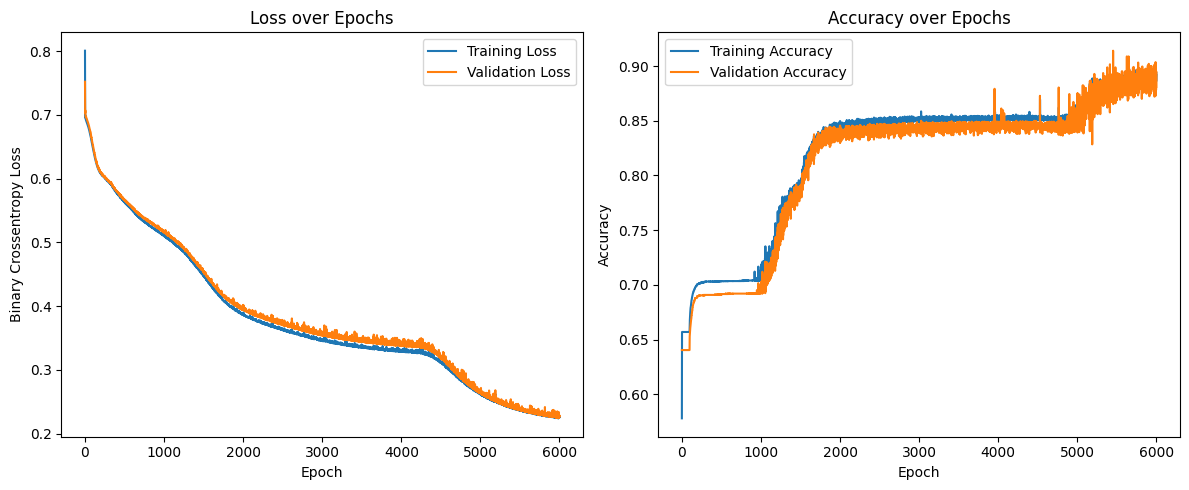

In [157]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Binary Crossentropy Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label="Training Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

In [171]:
def add_random_error(x, error_range=1.0):
    error = np.floor(100 * random.uniform(0, error_range)) / 100
    return x + error

def mod_predict(x):
    x = np.array(x, dtype=np.float64).reshape(-1, 1)
    probs = model.predict(x, verbose=0)
    pred = 1/(1+np.exp(-probs))
    #print(probs, pred)
    return pred >= 0.5


for n in [add_random_error(i) for i in range(-3, 10)]:
    result = mod_predict(n)
    print(f"{n}: {'Divisible by 3' if result else 'Not divisible by 3'}")

-2.58: Divisible by 3
-1.87: Not divisible by 3
-0.18000000000000005: Not divisible by 3
0.3: Divisible by 3
1.31: Not divisible by 3
2.74: Not divisible by 3
3.52: Divisible by 3
4.59: Not divisible by 3
5.3: Not divisible by 3
6.26: Divisible by 3
7.83: Not divisible by 3
8.28: Not divisible by 3
9.17: Divisible by 3


Model: "sequential_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_161 (Dense)           (None, 64)                320       
                                                                 
 dense_162 (Dense)           (None, 32)                2080      
                                                                 
 dense_163 (Dense)           (None, 16)                528       
                                                                 
 dense_164 (Dense)           (None, 8)                 136       
                                                                 
 dense_165 (Dense)           (None, 4)                 36        
                                                                 
 dense_166 (Dense)           (None, 1)                 5         
                                                                 
Total params: 3105 (12.13 KB)
Trainable params: 3105 

Epoch 113/1000
250/250 [==============================] - 1s 3ms/step - loss: 0.5722 - mae: 0.5866 - val_loss: 0.6023 - val_mae: 0.6004
Epoch 114/1000
250/250 [==============================] - 1s 3ms/step - loss: 0.6238 - mae: 0.6112 - val_loss: 0.5489 - val_mae: 0.5700
Epoch 115/1000
250/250 [==============================] - 1s 2ms/step - loss: 0.5769 - mae: 0.5886 - val_loss: 0.6509 - val_mae: 0.6291
Epoch 116/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.6017 - mae: 0.6014 - val_loss: 0.6174 - val_mae: 0.5987
Epoch 117/1000
250/250 [==============================] - 1s 2ms/step - loss: 0.5591 - mae: 0.5778 - val_loss: 0.7242 - val_mae: 0.6638
Epoch 118/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.6059 - mae: 0.6019 - val_loss: 0.6558 - val_mae: 0.6233
Epoch 119/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.5821 - mae: 0.5890 - val_loss: 0.5317 - val_mae: 0.5691
Epoch 120/1000
250/250 [========================

250/250 [==============================] - 1s 2ms/step - loss: 0.3423 - mae: 0.4526 - val_loss: 0.3617 - val_mae: 0.4678
Epoch 234/1000
250/250 [==============================] - 1s 3ms/step - loss: 0.3653 - mae: 0.4680 - val_loss: 0.3211 - val_mae: 0.4383
Epoch 235/1000
250/250 [==============================] - 1s 3ms/step - loss: 0.3332 - mae: 0.4478 - val_loss: 0.3261 - val_mae: 0.4376
Epoch 236/1000
250/250 [==============================] - 1s 3ms/step - loss: 0.3335 - mae: 0.4464 - val_loss: 0.2687 - val_mae: 0.4006
Epoch 237/1000
250/250 [==============================] - 1s 3ms/step - loss: 0.3291 - mae: 0.4438 - val_loss: 0.3217 - val_mae: 0.4406
Epoch 238/1000
250/250 [==============================] - 1s 3ms/step - loss: 0.3438 - mae: 0.4541 - val_loss: 0.3338 - val_mae: 0.4508
Epoch 239/1000
250/250 [==============================] - 1s 3ms/step - loss: 0.3214 - mae: 0.4380 - val_loss: 0.3288 - val_mae: 0.4424
Epoch 240/1000
250/250 [==============================] - 1s 3m

250/250 [==============================] - 1s 3ms/step - loss: 0.2268 - mae: 0.3672 - val_loss: 0.1921 - val_mae: 0.3371
Epoch 354/1000
250/250 [==============================] - 1s 3ms/step - loss: 0.2257 - mae: 0.3665 - val_loss: 0.1925 - val_mae: 0.3413
Epoch 355/1000
250/250 [==============================] - 1s 3ms/step - loss: 0.2256 - mae: 0.3654 - val_loss: 0.2120 - val_mae: 0.3503
Epoch 356/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.2020 - mae: 0.3477 - val_loss: 0.2787 - val_mae: 0.4076
Epoch 357/1000
250/250 [==============================] - 1s 2ms/step - loss: 0.2317 - mae: 0.3706 - val_loss: 0.2099 - val_mae: 0.3495
Epoch 358/1000
250/250 [==============================] - 1s 3ms/step - loss: 0.2229 - mae: 0.3615 - val_loss: 0.2107 - val_mae: 0.3499
Epoch 359/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.2109 - mae: 0.3543 - val_loss: 0.3493 - val_mae: 0.4618
Epoch 360/1000
250/250 [==============================] - 1s 2m

250/250 [==============================] - 0s 2ms/step - loss: 0.1693 - mae: 0.3166 - val_loss: 0.1946 - val_mae: 0.3430
Epoch 474/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.1593 - mae: 0.3067 - val_loss: 0.1654 - val_mae: 0.3158
Epoch 475/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.1769 - mae: 0.3208 - val_loss: 0.7047 - val_mae: 0.7145
Epoch 476/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.1747 - mae: 0.3190 - val_loss: 0.1295 - val_mae: 0.2772
Epoch 477/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.1900 - mae: 0.3333 - val_loss: 0.3947 - val_mae: 0.5017
Epoch 478/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.1579 - mae: 0.3054 - val_loss: 0.2145 - val_mae: 0.3548
Epoch 479/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.1827 - mae: 0.3274 - val_loss: 0.1754 - val_mae: 0.3187
Epoch 480/1000
250/250 [==============================] - 1s 3m

250/250 [==============================] - 0s 1ms/step - loss: 0.1533 - mae: 0.3003 - val_loss: 0.1137 - val_mae: 0.2629
Epoch 594/1000
250/250 [==============================] - 1s 2ms/step - loss: 0.1347 - mae: 0.2825 - val_loss: 0.1408 - val_mae: 0.2902
Epoch 595/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.1527 - mae: 0.2990 - val_loss: 0.1229 - val_mae: 0.2703
Epoch 596/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.1508 - mae: 0.2988 - val_loss: 0.1108 - val_mae: 0.2582
Epoch 597/1000
250/250 [==============================] - 1s 2ms/step - loss: 0.1409 - mae: 0.2895 - val_loss: 0.1270 - val_mae: 0.2713
Epoch 598/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.1450 - mae: 0.2933 - val_loss: 0.1477 - val_mae: 0.2985
Epoch 599/1000
250/250 [==============================] - 1s 2ms/step - loss: 0.1440 - mae: 0.2914 - val_loss: 0.1289 - val_mae: 0.2767
Epoch 600/1000
250/250 [==============================] - 1s 3m

250/250 [==============================] - 1s 2ms/step - loss: 0.1356 - mae: 0.2807 - val_loss: 0.1011 - val_mae: 0.2464
Epoch 714/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.1160 - mae: 0.2617 - val_loss: 0.1222 - val_mae: 0.2687
Epoch 715/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.1306 - mae: 0.2780 - val_loss: 0.1001 - val_mae: 0.2431
Epoch 716/1000
250/250 [==============================] - 1s 2ms/step - loss: 0.1197 - mae: 0.2655 - val_loss: 0.0922 - val_mae: 0.2349
Epoch 717/1000
250/250 [==============================] - 1s 3ms/step - loss: 0.1311 - mae: 0.2784 - val_loss: 0.0845 - val_mae: 0.2248
Epoch 718/1000
250/250 [==============================] - 1s 3ms/step - loss: 0.1205 - mae: 0.2651 - val_loss: 0.1540 - val_mae: 0.3081
Epoch 719/1000
250/250 [==============================] - 1s 3ms/step - loss: 0.1273 - mae: 0.2738 - val_loss: 0.2256 - val_mae: 0.3819
Epoch 720/1000
250/250 [==============================] - 0s 2m

250/250 [==============================] - 0s 2ms/step - loss: 0.1127 - mae: 0.2577 - val_loss: 0.1262 - val_mae: 0.2773
Epoch 834/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.1047 - mae: 0.2485 - val_loss: 0.0945 - val_mae: 0.2384
Epoch 835/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.1114 - mae: 0.2570 - val_loss: 0.1243 - val_mae: 0.2713
Epoch 836/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.1033 - mae: 0.2465 - val_loss: 0.1276 - val_mae: 0.2784
Epoch 837/1000
250/250 [==============================] - 1s 3ms/step - loss: 0.1294 - mae: 0.2756 - val_loss: 0.1268 - val_mae: 0.2758
Epoch 838/1000
250/250 [==============================] - 1s 2ms/step - loss: 0.1022 - mae: 0.2466 - val_loss: 0.1204 - val_mae: 0.2665
Epoch 839/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.1181 - mae: 0.2630 - val_loss: 0.1080 - val_mae: 0.2570
Epoch 840/1000
250/250 [==============================] - 0s 1m

250/250 [==============================] - 0s 2ms/step - loss: 0.1059 - mae: 0.2499 - val_loss: 0.0740 - val_mae: 0.2115
Epoch 954/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.1019 - mae: 0.2447 - val_loss: 0.0859 - val_mae: 0.2269
Epoch 955/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.1104 - mae: 0.2531 - val_loss: 0.0879 - val_mae: 0.2240
Epoch 956/1000
250/250 [==============================] - 1s 2ms/step - loss: 0.1024 - mae: 0.2447 - val_loss: 0.0919 - val_mae: 0.2343
Epoch 957/1000
250/250 [==============================] - 1s 2ms/step - loss: 0.1092 - mae: 0.2521 - val_loss: 0.1329 - val_mae: 0.2729
Epoch 958/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.0914 - mae: 0.2322 - val_loss: 0.1022 - val_mae: 0.2484
Epoch 959/1000
250/250 [==============================] - 1s 3ms/step - loss: 0.1003 - mae: 0.2432 - val_loss: 0.1133 - val_mae: 0.2636
Epoch 960/1000
250/250 [==============================] - 1s 2m

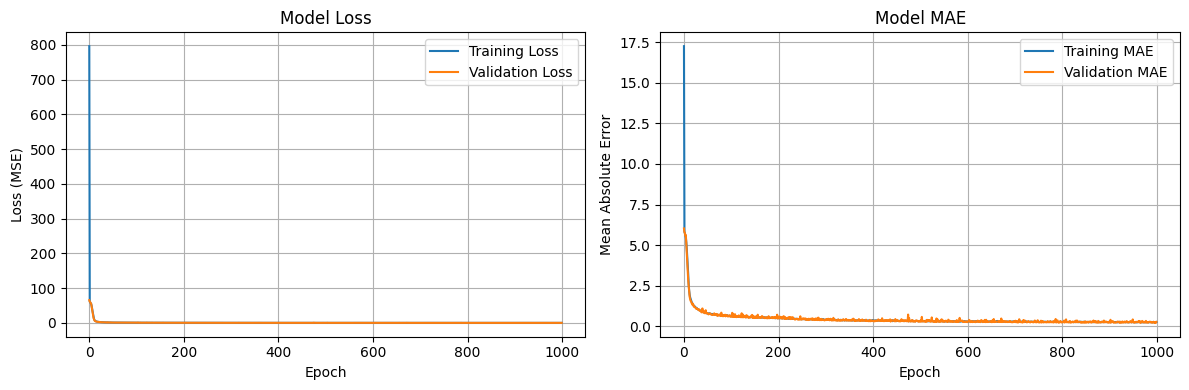

Testing custom matrix:
Custom matrix:
[[2 3]
 [1 4]]
Predicted determinant: 4.6282
Actual determinant: 5.0000
Error: 0.3718


In [127]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

np.random.seed(42)
tf.random.set_seed(42)


def generate_data(n_samples=10000):
    matrices = np.random.uniform(-10, 10, (n_samples, 2, 2))
    
    determinants = matrices[:, 0, 0] * matrices[:, 1, 1] - matrices[:, 0, 1] * matrices[:, 1, 0]
    matrices_flat = matrices.reshape(n_samples, 4)
    
    return matrices_flat, determinants

X, y = generate_data(100000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

model.summary()

history = model.fit(
    X_train, y_train,
    epochs=1000,
    batch_size=256,
    validation_split=0.2,
    verbose=1
)


test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)

print("Predictions:")
sample_indices = np.random.choice(len(X_test), 5)
for i in sample_indices:
    matrix = X_test[i].reshape(2, 2)
    predicted = model.predict(X_test[i:i+1], verbose=0)[0][0]
    actual = y_test[i]
    
    print(f"Matrix:\n{matrix}")
    print(f"Predicted determinant: {predicted:.4f}")
    print(f"Actual determinant: {actual:.4f}")
    print(f"Error: {abs(predicted - actual):.4f}")
    print("-" * 30)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print("Testing custom matrix:")
custom_matrix = np.array([[2, 3], [1, 4]])
custom_flat = custom_matrix.flatten().reshape(1, 4)
predicted_det = model.predict(custom_flat, verbose=0)[0][0]
actual_det = np.linalg.det(custom_matrix)

print(f"Custom matrix:\n{custom_matrix}")
print(f"Predicted determinant: {predicted_det:.4f}")
print(f"Actual determinant: {actual_det:.4f}")
print(f"Error: {abs(predicted_det - actual_det):.4f}")

In [128]:
model.predict(np.array([[-15, 10], [10, 10]]).flatten().reshape(1, 4), verbose=0)[0][0]

-226.5566